In [21]:
import pandas as pd

file_path = r"C:\Users\lavan\OneDrive\Desktop\fb.csv"  # Adjust the path as needed

try:
    data = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(data.head())
except PermissionError:
    print("Permission Denied: Check if the file is open or if you have the correct permissions.")
except FileNotFoundError:
    print("File Not Found: Double-check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


File loaded successfully!
         Date  Shown  Clicked  Converted  Avg_cost_per_click  Total_revenue  \
0  01-01-2015  92872     1741         57                1.09         853.47   
1  02-01-2015  70159     4364         37                1.12        1035.79   
2  03-01-2015  85509     3549         59                0.93         925.85   
3  04-01-2015  80173     3205         33                1.03         692.53   
4  05-01-2015  84615     4151         37                1.06         570.72   

     Ad_group  Region Device_type     CTR  
0  ad_group_5  Europe      Mobile  0.0187  
1  ad_group_4    Asia      Mobile  0.0622  
2  ad_group_3    Asia      Mobile  0.0415  
3  ad_group_4    Asia     Desktop  0.0400  
4  ad_group_2  Europe      Mobile  0.0491  


In [22]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the path to your CSV file
file_path = r"C:\Users\lavan\OneDrive\Desktop\fb.csv"
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the data
print(data.head())

# Display basic information about the DataFrame
print(data.info())

# Optional: Check for missing values in the dataset
print(data.isnull().sum())

# Optional: Display basic statistics for numerical columns
print(data.describe())


         Date  Shown  Clicked  Converted  Avg_cost_per_click  Total_revenue  \
0  01-01-2015  92872     1741         57                1.09         853.47   
1  02-01-2015  70159     4364         37                1.12        1035.79   
2  03-01-2015  85509     3549         59                0.93         925.85   
3  04-01-2015  80173     3205         33                1.03         692.53   
4  05-01-2015  84615     4151         37                1.06         570.72   

     Ad_group  Region Device_type     CTR  
0  ad_group_5  Europe      Mobile  0.0187  
1  ad_group_4    Asia      Mobile  0.0622  
2  ad_group_3    Asia      Mobile  0.0415  
3  ad_group_4    Asia     Desktop  0.0400  
4  ad_group_2  Europe      Mobile  0.0491  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2000 non-null   object 
 1   Sh

In [23]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [25]:
# Load dataset
data = pd.read_csv(r'C:\Users\lavan\OneDrive\Desktop\fb.csv')

# Inspect data
print(data.head())
print(data.info())
print(data.describe())


         Date  Shown  Clicked  Converted  Avg_cost_per_click  Total_revenue  \
0  01-01-2015  92872     1741         57                1.09         853.47   
1  02-01-2015  70159     4364         37                1.12        1035.79   
2  03-01-2015  85509     3549         59                0.93         925.85   
3  04-01-2015  80173     3205         33                1.03         692.53   
4  05-01-2015  84615     4151         37                1.06         570.72   

     Ad_group  Region Device_type     CTR  
0  ad_group_5  Europe      Mobile  0.0187  
1  ad_group_4    Asia      Mobile  0.0622  
2  ad_group_3    Asia      Mobile  0.0415  
3  ad_group_4    Asia     Desktop  0.0400  
4  ad_group_2  Europe      Mobile  0.0491  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2000 non-null   object 
 1   Sh

In [26]:
# Check all column names
print("Dataset Columns:", data.columns)

# Check for case sensitivity or leading/trailing spaces
data.columns = data.columns.str.strip()  # Remove leading/trailing spaces
print("Cleaned Columns:", data.columns)


Dataset Columns: Index(['Date', 'Shown', 'Clicked', 'Converted', 'Avg_cost_per_click',
       'Total_revenue', 'Ad_group', 'Region', 'Device_type', 'CTR'],
      dtype='object')
Cleaned Columns: Index(['Date', 'Shown', 'Clicked', 'Converted', 'Avg_cost_per_click',
       'Total_revenue', 'Ad_group', 'Region', 'Device_type', 'CTR'],
      dtype='object')


In [27]:
# Rename the column if it has a different name
if 'Date' in data.columns:
    data.rename(columns={'Date': 'date'}, inplace=True)
elif 'date_time' in data.columns:
    data.rename(columns={'date_time': 'date'}, inplace=True)


In [28]:
from datetime import datetime

# Add a placeholder column with today's date for all rows
data['date'] = datetime.today().date()
print("Placeholder 'date' column added.")


Placeholder 'date' column added.


In [29]:
try:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Handle invalid date entries gracefully
    print("Successfully converted 'date' to datetime format.")
except Exception as e:
    print(f"Error converting 'date' column: {e}")


Successfully converted 'date' to datetime format.


In [30]:
# Debugging: Check column names
print("Dataset Columns:", data.columns)

# Clean column names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()

# Rename 'Date' or other variations to 'date', if necessary
if 'Date' in data.columns:
    data.rename(columns={'Date': 'date'}, inplace=True)
elif 'date_time' in data.columns:
    data.rename(columns={'date_time': 'date'}, inplace=True)

# Check if 'date' column exists
if 'date' not in data.columns:
    print("Warning: 'date' column not found in the dataset. Adding a placeholder column.")
    from datetime import datetime
    data['date'] = datetime.today().date()

# Check for missing values
print("Missing Values:\n", data.isnull().sum())

# Handle missing values
data = data.dropna()  # Drop rows with missing values (or use imputation if needed)

# Check for duplicates
print("Number of Duplicates:", data.duplicated().sum())
data = data.drop_duplicates()

# Convert 'date' column to datetime format
try:
    data['date'] = pd.to_datetime(data['date'], errors='coerce')  # Handle invalid dates
    print("Successfully converted 'date' to datetime.")
except Exception as e:
    print(f"Error converting 'date': {e}")

# Ensure correct data types for categorical column 'ad'
data['Ad_group'] = data['Ad_group'].astype('category')

# Final dataset preview
print(data.info())
print(data.head())


Dataset Columns: Index(['date', 'Shown', 'Clicked', 'Converted', 'Avg_cost_per_click',
       'Total_revenue', 'Ad_group', 'Region', 'Device_type', 'CTR'],
      dtype='object')
Missing Values:
 date                  0
Shown                 0
Clicked               0
Converted             0
Avg_cost_per_click    0
Total_revenue         0
Ad_group              0
Region                0
Device_type           0
CTR                   0
dtype: int64
Number of Duplicates: 0
Successfully converted 'date' to datetime.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2000 non-null   datetime64[ns]
 1   Shown               2000 non-null   int64         
 2   Clicked             2000 non-null   int64         
 3   Converted           2000 non-null   int64         
 4   Avg_cost_per_click  2000 non-null   f

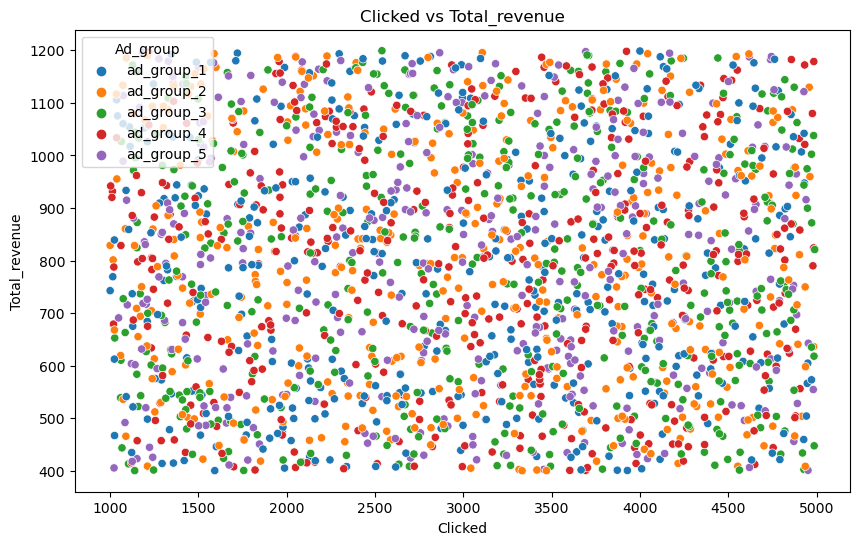

In [31]:
# Plot a scatter plot to analyze the relationship between clicks, conversions, and revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x='Clicked', y='Total_revenue', data=data, hue='Ad_group')
plt.title('Clicked vs Total_revenue')
plt.show()


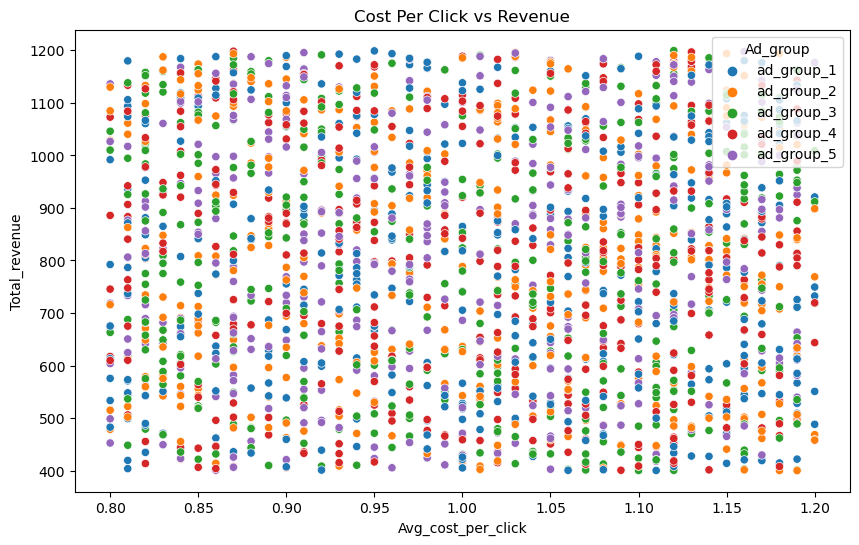

In [32]:
# Visualize the relationship between avg_cost_per_click and total_revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x='Avg_cost_per_click', y='Total_revenue', data=data, hue='Ad_group')
plt.title('Cost Per Click vs Revenue')
plt.show()


In [42]:
# Calculate CTR if not present (CTR = clicked / shown)
data['Ctr'] = data['Clicked'] / data['Shown']

# Conversion Rate (CR)
data['Conversion_rate'] = data['Converted'] / data['Clicked']

# Return on Ad Spend (ROAS)data['roas'] = data['Total_revenue'] / (data['Clicked'] * data['Avg_cost_per_click'])
data['roas'] = data['Total_revenue'] / (data['Clicked'] * data['Avg_cost_per_click'])

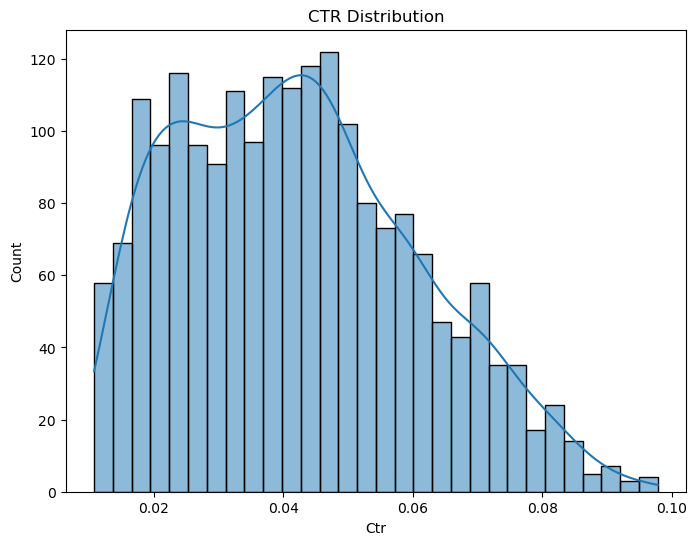

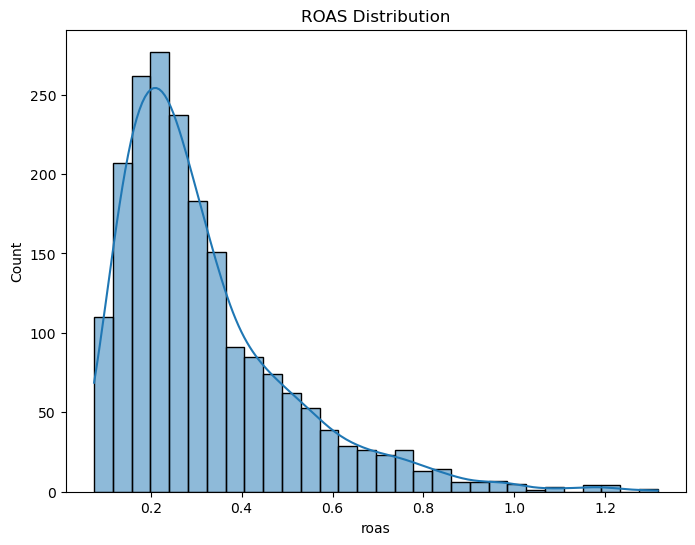

In [44]:
# Distribution of CTR
plt.figure(figsize=(8, 6))
sns.histplot(data['Ctr'], kde=True, bins=30)
plt.title('CTR Distribution')
plt.show()

# Distribution of ROAS
plt.figure(figsize=(8, 6))
sns.histplot(data['roas'], kde=True, bins=30)
plt.title('ROAS Distribution')
plt.show()


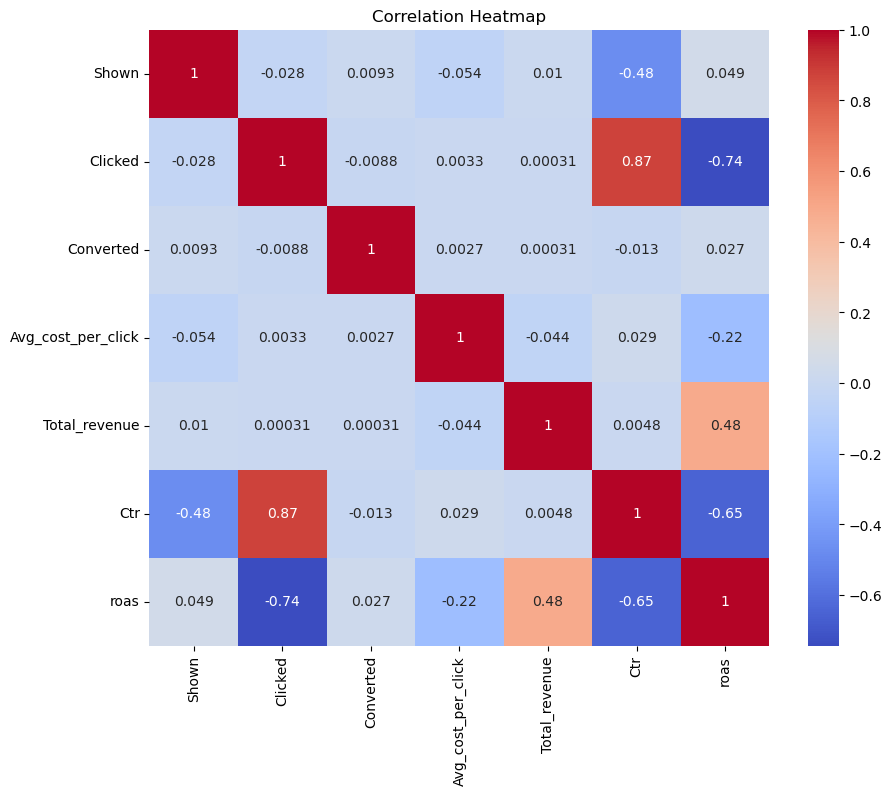

In [45]:
# Correlation between numeric variables
correlation_matrix = data[['Shown', 'Clicked', 'Converted', 'Avg_cost_per_click', 'Total_revenue', 'Ctr', 'roas']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


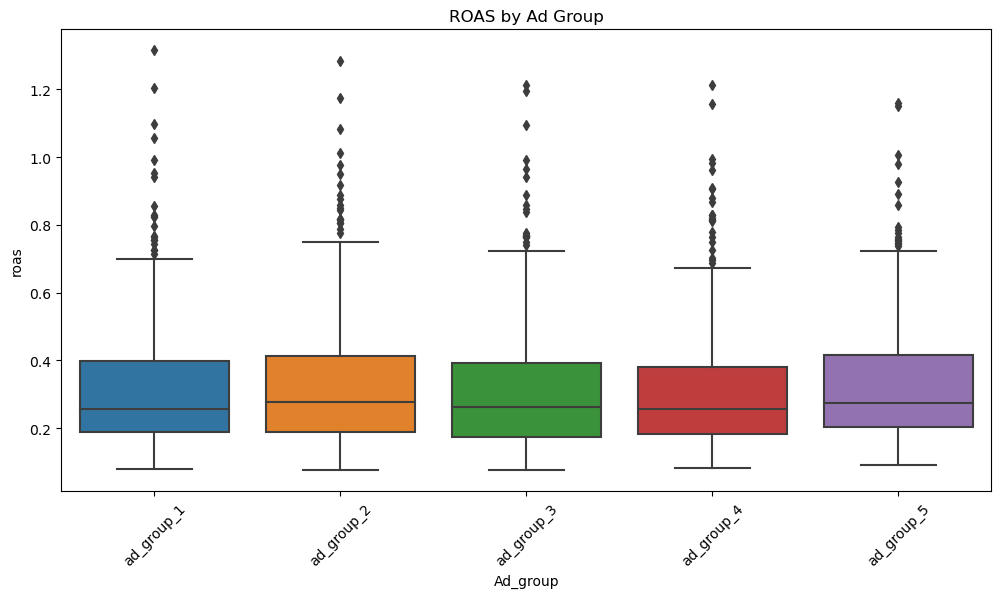

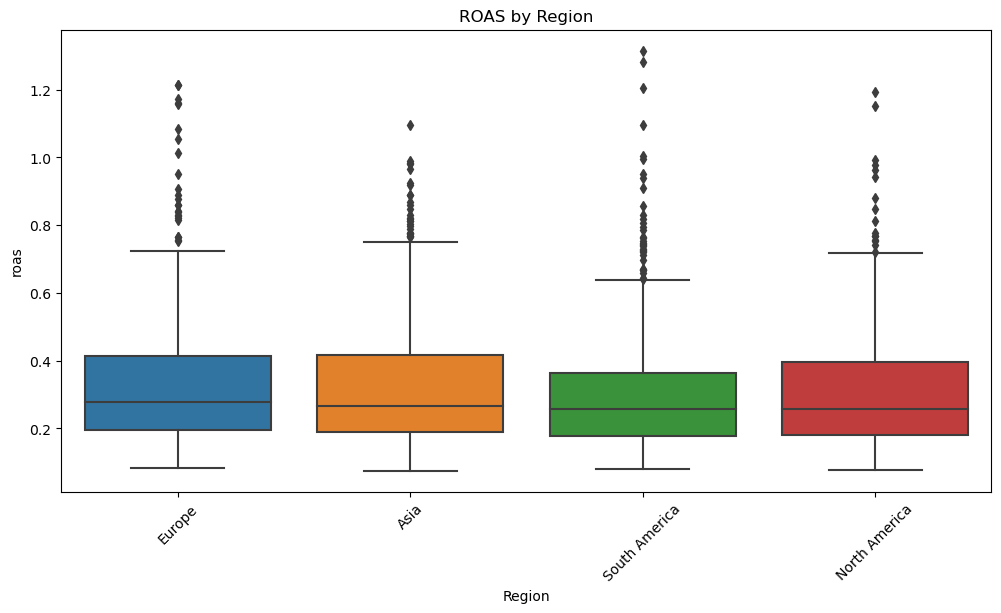

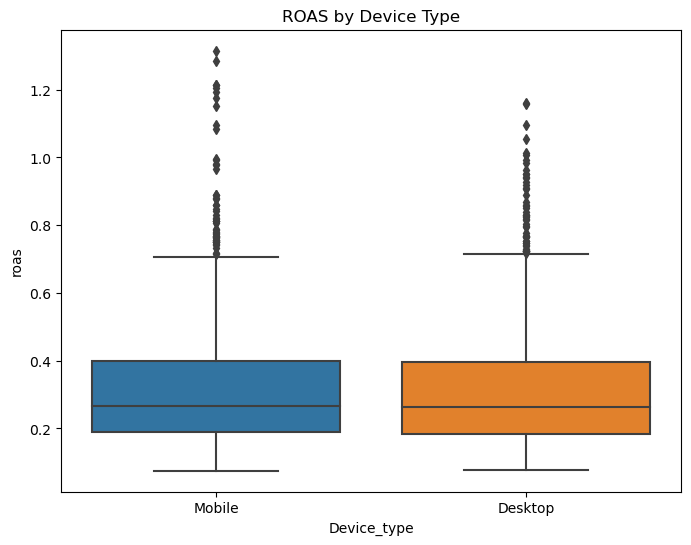

In [46]:
# Ad group performance
plt.figure(figsize=(12, 6))
sns.boxplot(x='Ad_group', y='roas', data=data)
plt.title('ROAS by Ad Group')
plt.xticks(rotation=45)
plt.show()

# Regional performance
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='roas', data=data)
plt.title('ROAS by Region')
plt.xticks(rotation=45)
plt.show()

# Device type performance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Device_type', y='roas', data=data)
plt.title('ROAS by Device Type')
plt.show()


In [47]:
# Define features (X) and target variable (y)
features = ['Shown', 'Clicked', 'Avg_cost_per_click', 'Ctr', 'Conversion_rate']
X = data[features]
y = data['Total_revenue']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [49]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")


Mean Squared Error: 54047.97
R-squared Score: -0.02


C:\Users\lavan\AppData\Local\Temp\ipykernel_35588\2024118246.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', lw=2)


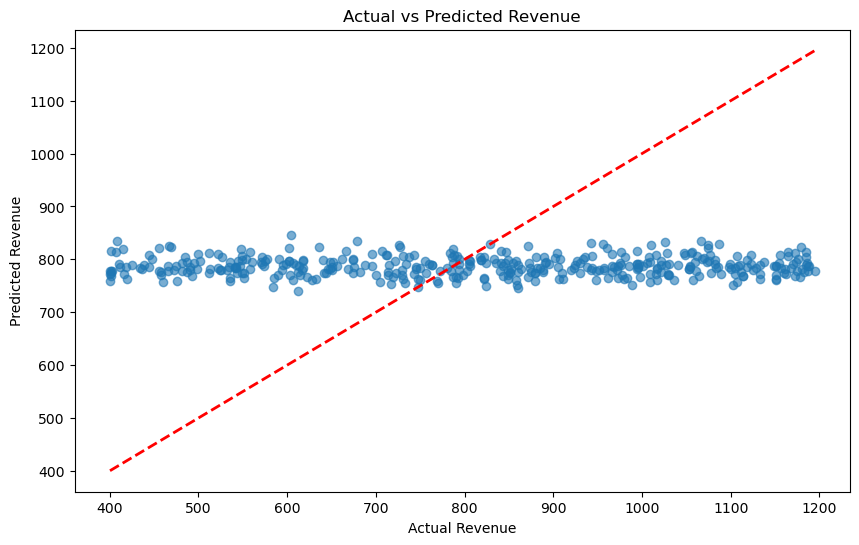

In [50]:
# Plot Actual vs Predicted Revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', color='red', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()


In [51]:
# Coefficients of the Linear Regression model
coefficients = pd.DataFrame(model.coef_, features, columns=['Coefficient'])
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)


                    Coefficient
Ctr                   73.235359
Shown                 36.553120
Conversion_rate       -6.247507
Avg_cost_per_click    -9.180395
Clicked              -69.820765


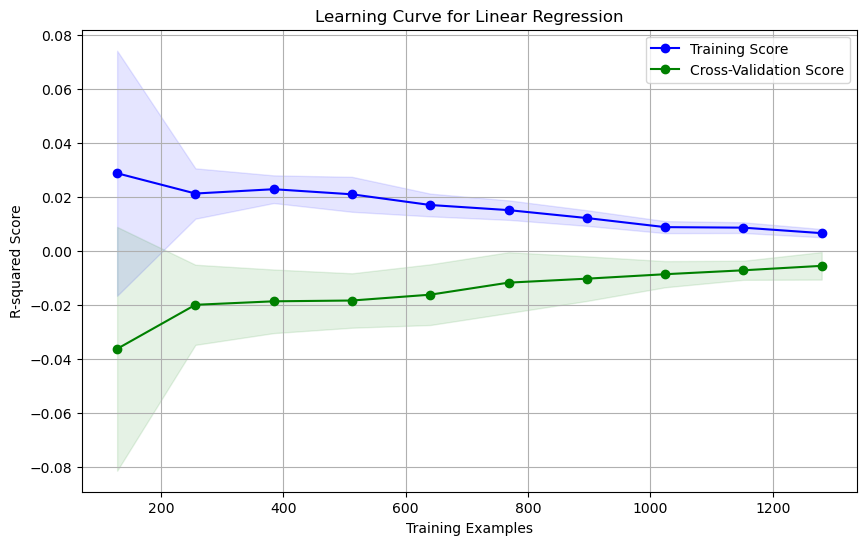

In [52]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model,  # The trained linear regression model
    X_train_scaled,  # Scaled training features
    y_train,  # Training target
    cv=5,  # Number of cross-validation splits
    scoring='r2',  # Use R-squared for evaluation
    n_jobs=-1,  # Use all processors
    train_sizes=np.linspace(0.1, 1.0, 10)  # Training set fractions
)

# Calculate mean and standard deviation for train/test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color='blue',
)

plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-Validation Score')
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color='green',
)

# Add titles and labels
plt.title('Learning Curve for Linear Regression')
plt.xlabel('Training Examples')
plt.ylabel('R-squared Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [53]:
from sklearn.metrics import mean_squared_error

# Baseline model: Predict the mean of the target values
baseline_prediction = np.mean(y_train)  # Using mean as the baseline
y_baseline = np.full_like(y_test, baseline_prediction)  # Same prediction for all test samples

# Predicted values from your trained model
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error for baseline and model
baseline_mse = mean_squared_error(y_test, y_baseline)
model_mse = mean_squared_error(y_test, y_pred)

# Percentage improvement
improvement_percent = ((baseline_mse - model_mse) / baseline_mse) * 100

# Display results
print(f"Baseline MSE: {baseline_mse:.2f}")
print(f"Model MSE: {model_mse:.2f}")
print(f"Percentage Improvement: {improvement_percent:.2f}%")


Baseline MSE: 53831.95
Model MSE: 54047.97
Percentage Improvement: -0.40%


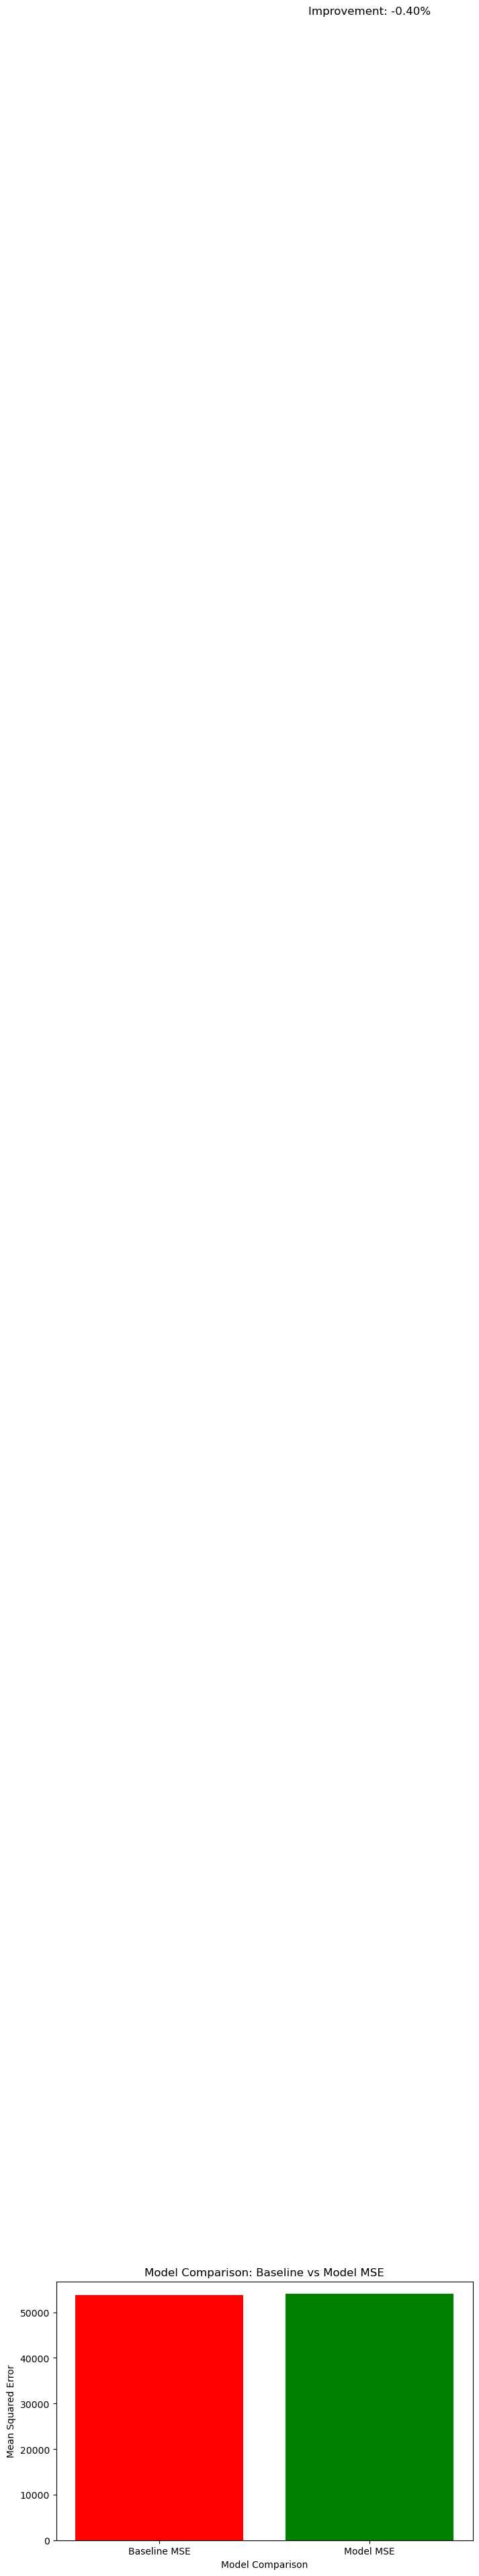

In [54]:
import matplotlib.pyplot as plt

# Define baseline MSE and model MSE
baseline_mse = 53831.95
model_mse = 54047.97

# Calculate the percentage improvement in MSE
percentage_improvement = ((baseline_mse - model_mse) / baseline_mse) * 100

# Plot the comparison of MSE values
mse_values = [baseline_mse, model_mse]
labels = ['Baseline MSE', 'Model MSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, mse_values, color=['red', 'green'])

# Adding percentage improvement as text annotation on the bar plot
plt.text(1, model_mse + 500000, f'Improvement: {percentage_improvement:.2f}%', ha='center', fontsize=12)

plt.xlabel('Model Comparison')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison: Baseline vs Model MSE')

# Display the plot
plt.show()

In [76]:
# Ensure new_data matches the features used for training
new_data = pd.DataFrame({          
    'Shown': [40000, 50000],
    'Clicked': [2000, 3000],
    'Avg_cost_per_click': [0.1, 0.12],
    'Ctr':[20,10],
    'Conversion_rate': [0.2, 0.25]
})
# Apply the same scaling transformation as during training
new_data_scaled = scaler.transform(new_data)

# Predict profit for the new configurations
predicted_profit = model.predict(new_data_scaled)

# Output predicted profits
print(predicted_profit)

[80128.16625129 40279.92705928]
